# **Importation**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
pip install emoji


In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
import numpy as np
import emoji
import re
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# **Load Dataset**

In [ ]:
data1 = pd.read_csv('emotion-labels-train.csv')

In [ ]:
data1.head()

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy


In [ ]:
data2 = pd.read_csv('emotion-labels-test.csv')
data2.head()

,text,label
0,You must be knowing #blithe means (adj.) Happ...,joy
1,Old saying 'A #smile shared is one gained for ...,joy
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,joy
3,@Elaminova sparkling water makes your life spa...,joy
4,I'm tired of everybody telling me to chill out...,joy


In [ ]:
data3 = pd.read_csv('emotion-labels-val.csv')
data3.head()

,text,label
0,"@theclobra lol I thought maybe, couldn't decid...",joy
1,Nawaz Sharif is getting more funnier than @kap...,joy
2,Nawaz Sharif is getting more funnier than @kap...,joy
3,@tomderivan73 😁...I'll just people watch and e...,joy
4,I love my family so much #lucky #grateful #sma...,joy


In [ ]:
data = pd.concat([data1,data2,data3], ignore_index=True)
data.head()

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy


In [ ]:
data['label'].value_counts()

,count
label,
fear,2252
anger,1701
joy,1616
sadness,1533


# **Text Cleaning**

In [ ]:
def remove_punctuation(text):
  punctuationfree = "".join([i for i in text if i not in string.punctuation])
  return punctuationfree

In [ ]:
data['text'] = data['text'].apply(lambda x:remove_punctuation(x))
data.head()

,text,label
0,Just got back from seeing GaryDelaney in Bursl...,joy
1,Oh dear an evening of absolute hilarity I dont...,joy
2,Been waiting all week for this game ❤️❤️❤️ che...,joy
3,gardinerlove Thank you so much Gloria Youre s...,joy
4,I feel so blessed to work with the family that...,joy


In [ ]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,label
0,just got back from seeing garydelaney in bursl...,joy
1,oh dear an evening of absolute hilarity i dont...,joy
2,been waiting all week for this game ❤️❤️❤️ che...,joy
3,gardinerlove thank you so much gloria youre s...,joy
4,i feel so blessed to work with the family that...,joy


# **Tokenization**

In [ ]:
data['text'] = data['text'].apply(word_tokenize)
data.head()

,text,label
0,"[just, got, back, from, seeing, garydelaney, i...",joy
1,"[oh, dear, an, evening, of, absolute, hilarity...",joy
2,"[been, waiting, all, week, for, this, game, ❤️...",joy
3,"[gardinerlove, thank, you, so, much, gloria, y...",joy
4,"[i, feel, so, blessed, to, work, with, the, fa...",joy


# **StopWords**

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
  output=[i for i in text if i not in stopwords]
  return output

In [ ]:
data['text'] = data['text'].apply(lambda x:remove_stopwords(x))
data.head()

,text,label
0,"[got, back, seeing, garydelaney, burslem, amaz...",joy
1,"[oh, dear, evening, absolute, hilarity, dont, ...",joy
2,"[waiting, week, game, ❤️❤️❤️, cheer, friday, ❤️]",joy
3,"[gardinerlove, thank, much, gloria, youre, swe...",joy
4,"[feel, blessed, work, family, nanny, ❤️, nothi...",joy


# **Lemmatization**

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text

In [ ]:
data['text'] = data['text'].apply(lambda x:lemmatizer(x))
data.head()

,text,label
0,"[got, back, seeing, garydelaney, burslem, amaz...",joy
1,"[oh, dear, evening, absolute, hilarity, dont, ...",joy
2,"[waiting, week, game, ❤️❤️❤️, cheer, friday, ❤️]",joy
3,"[gardinerlove, thank, much, gloria, youre, swe...",joy
4,"[feel, blessed, work, family, nanny, ❤️, nothi...",joy


# **Vectorization TF-IDF**

In [ ]:
def join_token(tokens):
  if isinstance(tokens, list):
    return ' '.join(tokens)
  return str(tokens)
data['text'] = data['text'].apply(join_token)
data.head()

,text,label
0,got back seeing garydelaney burslem amazing fa...,joy
1,oh dear evening absolute hilarity dont think l...,joy
2,waiting week game ❤️❤️❤️ cheer friday ❤️,joy
3,gardinerlove thank much gloria youre sweet tho...,joy
4,feel blessed work family nanny ❤️ nothing love...,joy


In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
x = vectorizer.fit_transform(data['text']).toarray()
y = data['label']

# **Split the data into train and test**

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['label'])
y = to_categorical(y)

In [ ]:
x_train, x_test, y_train , y_test = train_test_split(x,y, test_size=0.25, random_state=42)

# **Model Building**

In [ ]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.3407 - loss: 1.3311 - val_accuracy: 0.7795 - val_loss: 0.6972
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.8834 - loss: 0.4012 - val_accuracy: 0.8283 - val_loss: 0.5051
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9655 - loss: 0.1144 - val_accuracy: 0.8386 - val_loss: 0.5593
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9751 - loss: 0.0753 - val_accuracy: 0.8293 - val_loss: 0.5823
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9750 - loss: 0.0730 - val_accuracy: 0.8283 - val_loss: 0.5947
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9816 - loss: 0.0494 - val_accuracy: 0.8255 - val_loss: 0.5967
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9772 - loss: 0.0517 - val_accuracy: 0.8255 - val_loss: 0.6011
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9843 - loss: 0.0421 - val_accu

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=-1)
y_test_classes = y_test.argmax(axis=-1)
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f'Accuracy: {accuracy:.2f}')

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy: 0.84


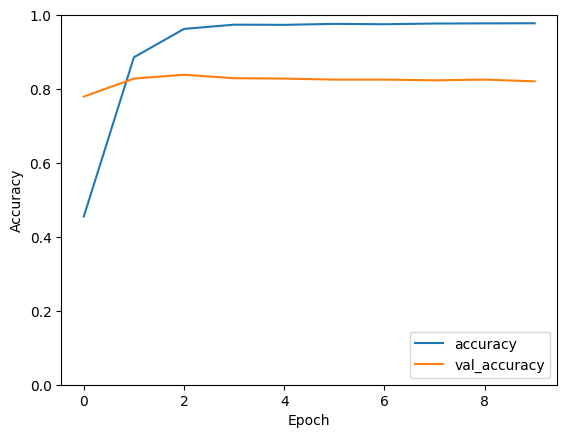

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# OWN TEST

In [ ]:
new_texts = [
    "I am feeling great today!",
    "I am so frustrated with everything.",
    "What a wonderful and exciting day!",
    "I am so angry about the situation."
]

# Preprocess new texts
new_texts_processed = [ ' '.join(text.split()) for text in new_texts ]  # Ensure text is in the same format

# Vectorize new texts using the same TF-IDF Vectorizer
new_texts_vectorized = vectorizer.transform(new_texts_processed).toarray()

# Make predictions
predictions = model.predict(new_texts_vectorized)

# Convert predictions to class labels
predicted_classes = predictions.argmax(axis=-1)
predicted_labels = label_encoder.inverse_transform(predicted_classes)

# Print predictions
for text, label in zip(new_texts, predicted_labels):
    print(f'Text: "{text}" - Predicted Emotion: {label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Text: "I am feeling great today!" - Predicted Emotion: fear
Text: "I am so frustrated with everything." - Predicted Emotion: joy
Text: "What a wonderful and exciting day!" - Predicted Emotion: joy
Text: "I am so angry about the situation." - Predicted Emotion: anger
